In [10]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
labelencoder = LabelEncoder()

# Impor dataset
dataset = pd.read_csv('dataset.csv')
datasetc = pd.read_csv('dataset.csv')


In [11]:
columns_to_drop = ['user-id', 'user-gender', 'user-nationality', 'user-knowledge', 'user-loyalty', 'user-loan',
                   'user-riskAversion', 'user-marital', 'product-type', 'product-risk', 'transaction-id', 'product-yield']

datasetc.drop(columns=columns_to_drop, inplace=True)
datasetc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user-age         999 non-null    int64  
 1   user-income      999 non-null    int64  
 2   user-savings     999 non-null    int64  
 3   user-properties  999 non-null    int64  
 4   user-dependents  999 non-null    int64  
 5   user-pension     999 non-null    int64  
 6   product-term     999 non-null    int64  
 7   year             999 non-null    int64  
 8   month            999 non-null    int64  
 9   score            999 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


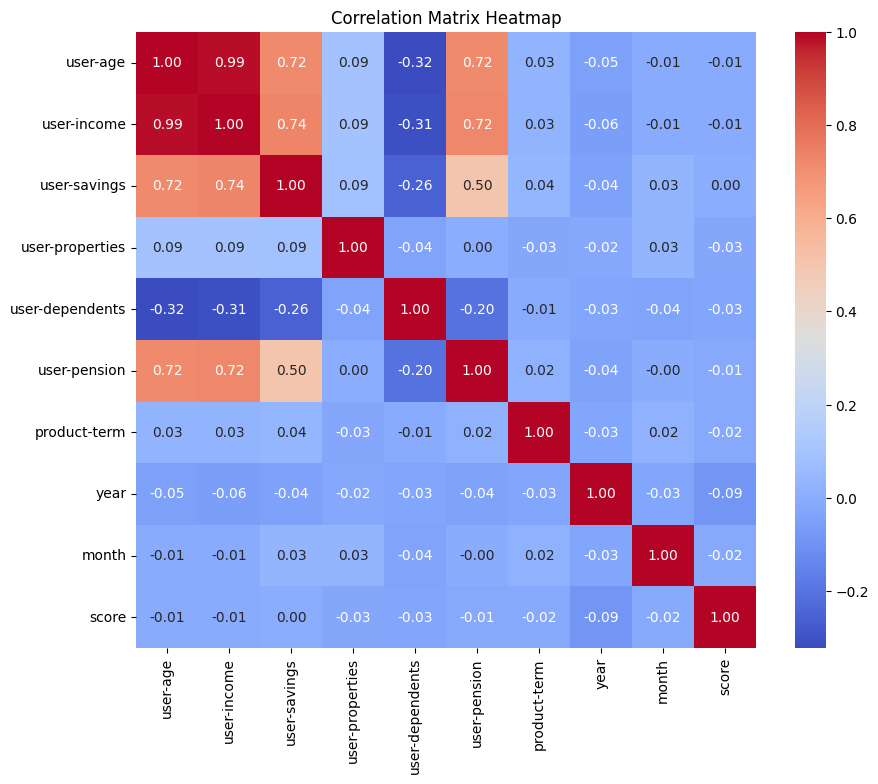

In [12]:
# Menghitung matriks korelasi
correlation_matrix = datasetc.corr()

# Plot heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user-id            999 non-null    object 
 1   user-age           999 non-null    int64  
 2   user-gender        999 non-null    object 
 3   user-nationality   999 non-null    object 
 4   user-knowledge     999 non-null    object 
 5   user-loyalty       999 non-null    object 
 6   user-loan          999 non-null    object 
 7   user-income        999 non-null    int64  
 8   user-savings       999 non-null    int64  
 9   user-properties    999 non-null    int64  
 10  user-riskAversion  999 non-null    object 
 11  user-marital       999 non-null    object 
 12  user-dependents    999 non-null    int64  
 13  user-pension       999 non-null    int64  
 14  product-type       999 non-null    object 
 15  product-risk       999 non-null    object 
 16  product-term       999 non

In [14]:
# Identifikasi data dan label
X = dataset.iloc[:, [1]].values #fitur
y = dataset.iloc[:, 7].values

In [15]:
# # Mengonversi data kategori jenis kelamin menjadi numerik
# X[:, 1] = labelencoder.fit_transform(X[:, 1])

# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
regressionModel = Sequential()

# Menambah input layer dan hidden layer pertama
regressionModel.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah hidden layer kedua
regressionModel.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
regressionModel.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Meenjalankan ANN
regressionModel.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting ANN ke training set
regressionModel.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Memprediksi hasil test set
y_pred = regressionModel.predict(X_test)

Epoch 1/100


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 130271672.0000 
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 119374568.0000
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 123970552.0000
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 123229880.0000
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 120106464.0000
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 122326872.0000
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 125051672.0000
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 122688672.0000
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 123102912.0000
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 125647872.0000
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 123077184.0000
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 121823528.0000 
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115395928.0000
Epoch 14/100
80/80 ━

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae_modified = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print modified metrics
print("Root Mean Square Error (RMSE):", rmse_modified)
print("Mean Absolute Error (MAE):", mae_modified)
print("R-squared (R^2):", r_squared)

Root Mean Square Error (RMSE): 580.6195845038354
Mean Absolute Error (MAE): 468.29817749023437
R-squared (R^2): 0.97192475807527


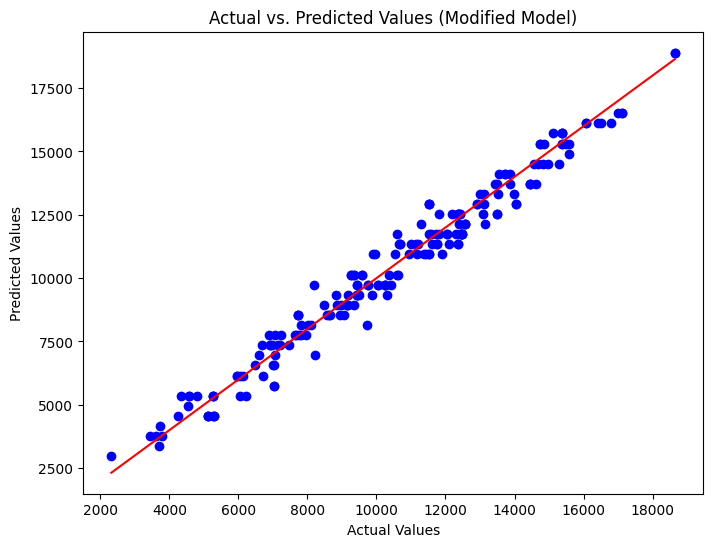

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Actual vs. Predicted Values (Modified Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()